In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Adjust path to your dataset location in Drive
import pandas as pd
file_path = "/content/drive/MyDrive/Lung Cancer.csv"
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Check data types & missing values
print(df.info())
print(df.isna().sum())

# Peek at first few rows
df.head()


Shape: (890000, 17)
Columns: ['s', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   s                   890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension    

,s,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10-09-2017,0
1,2,50,Female,Netherlands,20-04-2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17-06-2024,1
2,3,65,Female,Hungary,05-04-2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09-04-2024,0
3,4,51,Female,Belgium,05-02-2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23-04-2017,0
4,5,37,Male,Luxembourg,29-11-2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08-01-2025,0


In [3]:
df['survived'] = df['survived'].astype(str).str.lower()
print(df['survived'].value_counts(normalize=True))  # class balance


survived
0    0.779771
1    0.220229
Name: proportion, dtype: float64


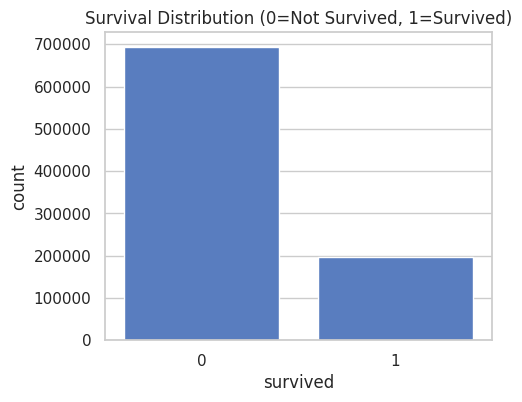

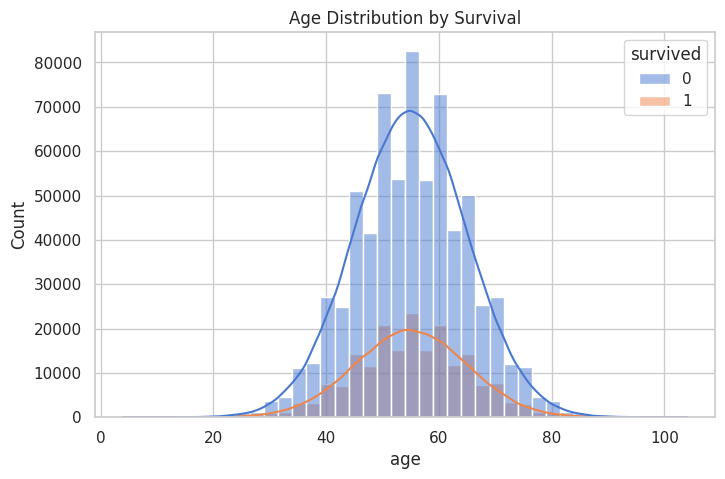

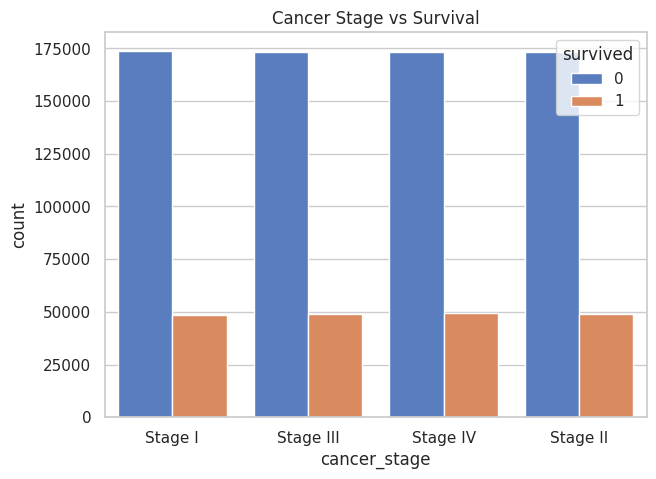

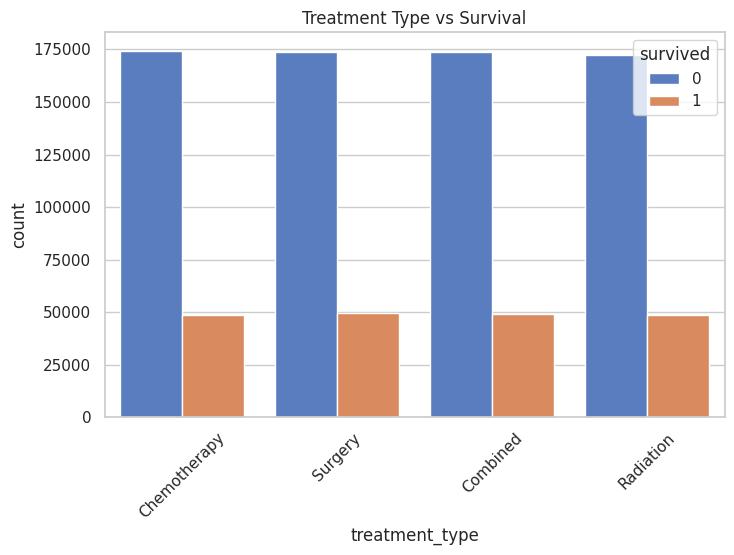

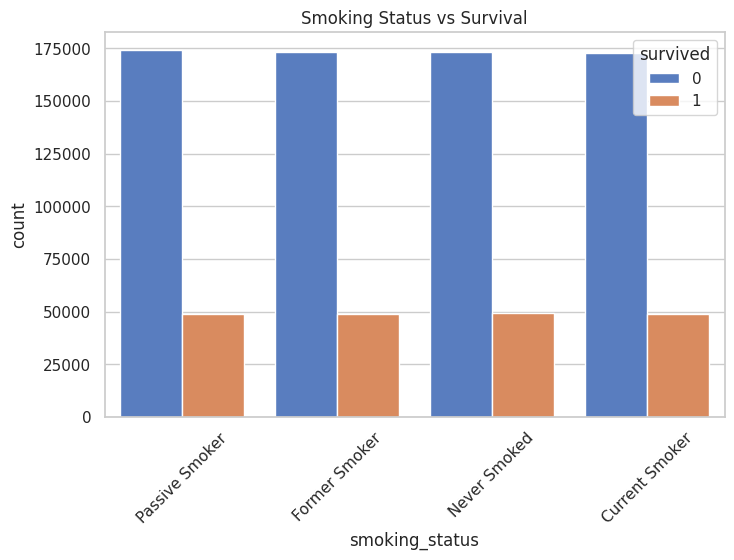

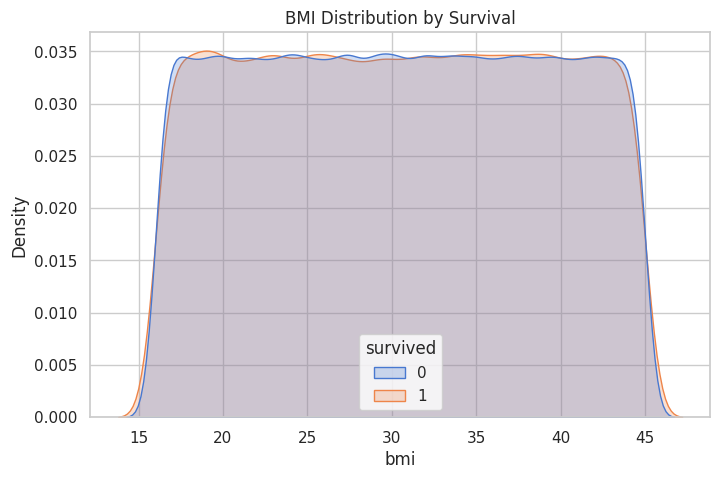

In [4]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from Google Drive
file_path = "/content/drive/MyDrive/Lung Cancer.csv"
df = pd.read_csv(file_path)

# Fix dtypes
df["survived"] = pd.to_numeric(df["survived"], errors="coerce")
df["bmi"] = pd.to_numeric(df["bmi"], errors="coerce")

# Style
sns.set(style="whitegrid", palette="muted")

# 1. Survival distribution
plt.figure(figsize=(5,4))
sns.countplot(x="survived", data=df)
plt.title("Survival Distribution (0=Not Survived, 1=Survived)")
plt.show()

# 2. Age distribution by survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="survived", kde=True, bins=40)
plt.title("Age Distribution by Survival")
plt.show()

# 3. Cancer stage vs survival
plt.figure(figsize=(7,5))
sns.countplot(x="cancer_stage", hue="survived", data=df)
plt.title("Cancer Stage vs Survival")
plt.show()

# 4. Treatment type vs survival
plt.figure(figsize=(8,5))
sns.countplot(x="treatment_type", hue="survived", data=df)
plt.title("Treatment Type vs Survival")
plt.xticks(rotation=45)
plt.show()

# 5. Smoking status vs survival
plt.figure(figsize=(8,5))
sns.countplot(x="smoking_status", hue="survived", data=df)
plt.title("Smoking Status vs Survival")
plt.xticks(rotation=45)
plt.show()

# 6. BMI distribution by survival (fixed)
df_bmi = df.dropna(subset=["bmi", "survived"])
plt.figure(figsize=(8,5))
sns.kdeplot(data=df_bmi, x="bmi", hue="survived", fill=True, common_norm=False)
plt.title("BMI Distribution by Survival")
plt.show()


In [18]:
# Run in a notebook cell (Colab)
!pip install -q tensorflow scikit-learn pandas joblib matplotlib seaborn


In [19]:

# 1. Import libraries and set random seeds


import os
import random
import numpy as np
import pandas as pd

import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    precision_recall_curve, auc, roc_curve
)

# Deep learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers


# Fix seeds for reproducibility

SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)


# Dataset path (change if needed)

DATA_FILE = "Lung Cancer.csv"


In [20]:

# 2. Load dataset and inspect structure


# Read the dataset
df = pd.read_csv(DATA_FILE, engine="python", on_bad_lines="skip")

# Basic information
print(f"Dataset shape: {df.shape}")
print(f"Available columns: {list(df.columns)}")


#  automatically detect the target column

candidate_targets = [
    "survived", "survival_status", "survival",
    "survived?", "survived_status", "target"
]

target_col = None
for col in candidate_targets:
    if col in df.columns:
        target_col = col
        break

# If none of the common names found, take last column as fallback
if target_col is None:
    target_col = df.columns[-1]

print(f"\nSelected target column: {target_col}")
print(df[target_col].value_counts(dropna=False))


#  missing-value check

print("\nTop 10 columns with most missing values:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Preview few rows
df.head(6)


Dataset shape: (890000, 17)
Available columns: ['s', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']

Selected target column: survived
survived
0    693996
1    196004
Name: count, dtype: int64

Top 10 columns with most missing values:
s                    0
age                  0
gender               0
country              0
diagnosis_date       0
cancer_stage         0
family_history       0
smoking_status       0
bmi                  0
cholesterol_level    0
dtype: int64


,s,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-2016,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10-09-2017,0
1,2,50,Female,Netherlands,20-04-2023,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17-06-2024,1
2,3,65,Female,Hungary,05-04-2023,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09-04-2024,0
3,4,51,Female,Belgium,05-02-2016,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23-04-2017,0
4,5,37,Male,Luxembourg,29-11-2023,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08-01-2025,0
5,6,50,Male,Italy,02-01-2023,Stage I,No,Never Smoked,37.6,274,1,0,0,0,Radiation,27-12-2024,0


In [21]:

# 3. Preprocessing

from collections import defaultdict


# Convert target column into binary 0/1 labels

def detect_target(y_series):
    """
    Convert a target column (y) into a binary numpy array (0/1).
    Handles both numeric and common string formats like 'yes/no', 'alive/dead'.
    """
    if y_series.dtype.kind in "biufc":  # numeric types
        return y_series.fillna(0).astype(int).values

    # Map common string values into 0/1
    label_map = {
        "no": 0, "No": 0, "NO": 0, "n": 0, "N": 0, "0": 0,
        "yes": 1, "Yes": 1, "YES": 1, "y": 1, "Y": 1, "1": 1,
        "survived": 1, "Survived": 1, "alive": 1, "Alive": 1,
        "dead": 0, "Dead": 0
    }
    return y_series.map(lambda v: label_map.get(v, 0)).fillna(0).astype(int).values



# Fit preprocessing pipeline

def fit_preprocessor(df, target_col, max_cat=50, drop_date_cols=True, max_rows=None):
    """
    Prepares the dataset for ML:
      - Encodes target column into binary labels
      - Handles dates (optionally computing treatment duration)
      - Identifies categorical and numerical features
      - Fits imputers and scalers
      - Encodes categories (top N values retained, rest → 'OTHER')
    """
    df = df.copy()

    #  1. Separate target and features
    y = detect_target(df[target_col])
    X = df.drop(columns=[target_col]).copy()

    #  2. Handle date columns
    if "diagnosis_date" in X.columns and "end_treatment_date" in X.columns:
        X["diagnosis_date"] = pd.to_datetime(X["diagnosis_date"], errors="coerce")
        X["end_treatment_date"] = pd.to_datetime(X["end_treatment_date"], errors="coerce")
        X["treatment_duration_days"] = (
            (X["end_treatment_date"] - X["diagnosis_date"]).dt.days.fillna(-1)
        )

    if drop_date_cols:  # remove raw date fields
        drop_cols = [c for c in X.columns if "date" in c.lower()]
        X = X.drop(columns=drop_cols, errors="ignore")

    #  3. Optional downsampling
    if max_rows and len(X) > max_rows:
        frac = max_rows / len(X)
        X, _, y, _ = train_test_split(X, y, train_size=frac, stratify=y, random_state=SEED_VALUE)

    #  4. Identify feature types
    num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
    cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    #  5. Category mappings (limit unique values)
    cat_maps = {}
    for col in cat_cols:
        top_vals = X[col].value_counts(dropna=True).nlargest(max_cat).index.tolist()
        # Assign IDs (reserve 0 for unknown/NaN)
        mapping = {val: idx + 1 for idx, val in enumerate(top_vals)}
        cat_maps[col] = mapping

    #  6. Numeric preprocessing (impute + scale)
    num_imputer = SimpleImputer(strategy="median")
    scaler = StandardScaler()

    if num_cols:
        X_num = num_imputer.fit_transform(X[num_cols])
        X_num = scaler.fit_transform(X_num)
    else:
        X_num = np.empty((len(X), 0))

    #  7. Encode categorical features
    X_cat = []
    for col in cat_cols:
        mapping = cat_maps[col]
        arr = X[col].map(lambda v: mapping.get(v, 0)).fillna(0).astype(int).values
        X_cat.append(arr.reshape(-1, 1))

    X_cat = np.hstack(X_cat) if X_cat else np.empty((len(X), 0))

    #  8. Combine numeric + categorical
    X_processed = np.hstack([X_num, X_cat]) if X_cat.size else X_num

    preprocessor = {
        "num_cols": num_cols,
        "cat_cols": cat_cols,
        "cat_maps": cat_maps,
        "num_imputer": num_imputer,
        "scaler": scaler,
        "max_cat": max_cat
    }
    return X_processed, y, preprocessor



# Transform new data using fitted preprocessor

def transform_with_preprocessor(df, preprocessor, drop_date_cols=True):
    """
    Applies a fitted preprocessing pipeline to new data.
    Ensures consistent transformations across train/test datasets.
    """
    X = df.copy()

    # Handle date columns consistently
    if "diagnosis_date" in X.columns and "end_treatment_date" in X.columns:
        X["diagnosis_date"] = pd.to_datetime(X["diagnosis_date"], errors="coerce")
        X["end_treatment_date"] = pd.to_datetime(X["end_treatment_date"], errors="coerce")
        X["treatment_duration_days"] = (
            (X["end_treatment_date"] - X["diagnosis_date"]).dt.days.fillna(-1)
        )

    if drop_date_cols:
        drop_cols = [c for c in X.columns if "date" in c.lower()]
        X = X.drop(columns=drop_cols, errors="ignore")

    # Extract preprocessor components
    num_cols = preprocessor["num_cols"]
    cat_cols = preprocessor["cat_cols"]
    num_imputer = preprocessor["num_imputer"]
    scaler = preprocessor["scaler"]
    cat_maps = preprocessor["cat_maps"]

    # Numeric transform
    if num_cols:
        X_num = num_imputer.transform(X[num_cols])
        X_num = scaler.transform(X_num)
    else:
        X_num = np.empty((len(X), 0))

    # Categorical transform
    X_cat = []
    for col in cat_cols:
        mapping = cat_maps.get(col, {})
        arr = X[col].map(lambda v: mapping.get(v, 0)).fillna(0).astype(int).values
        X_cat.append(arr.reshape(-1, 1))

    X_cat = np.hstack(X_cat) if X_cat else np.empty((len(X), 0))

    # Final combined features
    return np.hstack([X_num, X_cat]) if X_cat.size else X_num



In [22]:

# 4. Preprocess dataset


#  full dataset (max_rows=None)
X_proc, y, preproc = fit_preprocessor(
    df,
    target_col=target_col,
    max_cat=50,
    drop_date_cols=True,
    max_rows=100000   # change to None for full dataset
)

print(f"Feature matrix shape after preprocessing: {X_proc.shape}")

# Save preprocessor for reuse
joblib.dump(preproc, "preprocessor.joblib")
print("Preprocessor saved as: preprocessor.joblib")



Feature matrix shape after preprocessing: (100000, 15)
Preprocessor saved as: preprocessor.joblib


In [23]:

# 5. Train/test split and class weights


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_proc, y,
    test_size=0.2,
    stratify=y,
    random_state=SEED_VALUE
)

print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

# Compute balanced class weights
unique_classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced", classes=unique_classes, y=y_train)
class_weight = {int(c): w for c, w in zip(unique_classes, weights)}

print("Class weights assigned:", class_weight)



Train set shape: (80000, 15), Test set shape: (20000, 15)
Class weights assigned: {0: np.float64(0.641210605623417), 1: np.float64(2.2704052673402204)}


In [24]:

# 6. Build the neural network


input_dim = X_train.shape[1]

def build_model(input_dim, lr=1e-3):
    """
    Create and compile a simple feed-forward neural network
    for binary classification.
    """
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])

    # Compile with Adam optimizer and AUC as the evaluation metric
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["AUC"]
    )
    return model


# Initialize and summarize the model
model = build_model(input_dim)
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,313 (177.00 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
133/133 - 3s - 23ms/step - AUC: 0.4988 - loss: 0.7070 - val_AUC: 0.5075 - val_loss: 0.7236
Epoch 2/100
133/133 - 1s - 8ms/step - AUC: 0.5009 - loss: 0.6953 - val_AUC: 0.5099 - val_loss: 0.7219
Epoch 3/100
133/133 - 1s - 8ms/step - AUC: 0.5037 - loss: 0.6940 - val_AUC: 0.5034 - val_loss: 0.7039
Epoch 4/100
133/133 - 1s - 9ms/step - AUC: 0.5026 - loss: 0.6935 - val_AUC: 0.5077 - val_loss: 0.7154
Epoch 5/100
133/133 - 1s - 8ms/step - AUC: 0.5076 - loss: 0.6930 - val_AUC: 0.5015 - val_loss: 0.7005
Epoch 6/100
133/133 - 1s - 8ms/step - AUC: 0.5067 - loss: 0.6930 - val_AUC: 0.5069 - val_loss: 0.7094
Epoch 7/100
133/133 - 2s - 15ms/step - AUC: 0.5072 - loss: 0.6928 - val_AUC: 0.4991 - val_loss: 0.7027
Epoch 8/100
133/133 - 2s - 16ms/step - AUC: 0.5071 - loss: 0.6929 - val_AUC: 0.4973 - val_loss: 0.6990
Epoch 9/100
133/133 - 1s - 8ms/step - AUC: 0.5029 - loss: 0.6928 - val_AUC: 0.4981 - val_loss: 0.6960
Epoch 10/100
133/133 - 1s - 8ms/step - AUC: 0.5044 - loss: 0.6928 - val_AUC: 0.

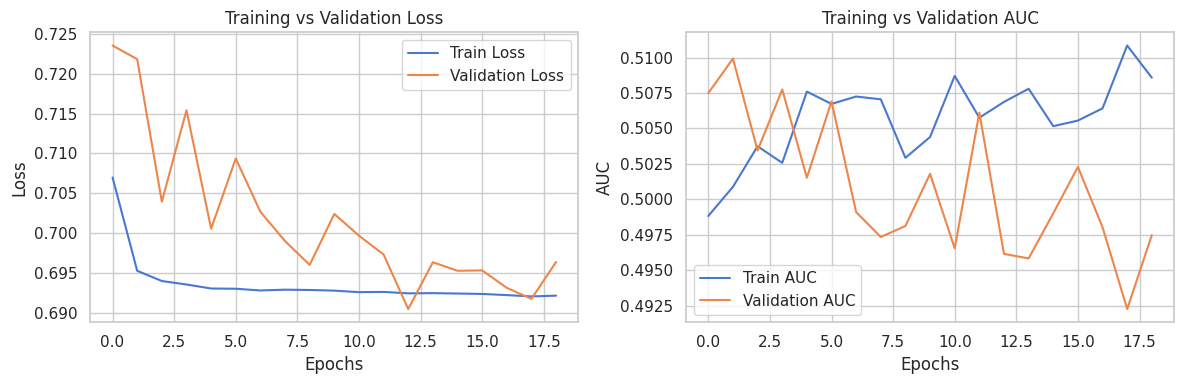

In [25]:

# 7. Train the model


# Early stopping to avoid overfitting
early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True,
    verbose=1
)

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=100,
    batch_size=512,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=2
)


# 8. Plot training history (Loss & AUC)

plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# AUC curves
plt.subplot(1, 2, 2)
plt.plot(history.history["AUC"], label="Train AUC")
plt.plot(history.history["val_AUC"], label="Validation AUC")
plt.title("Training vs Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy     : 0.6826
Precision    : 0.2159
Recall       : 0.1675
F1-score     : 0.1887
ROC-AUC      : 0.4936

Detailed classification report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80     15595
           1       0.22      0.17      0.19      4405

    accuracy                           0.68     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.65      0.68      0.67     20000



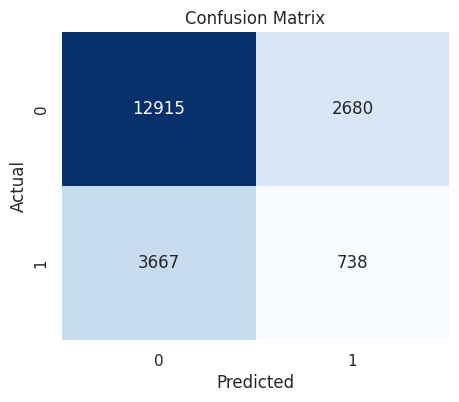

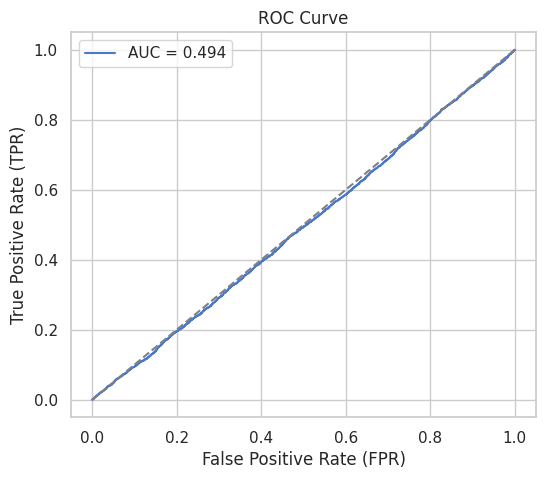

PR-AUC       : 0.2169


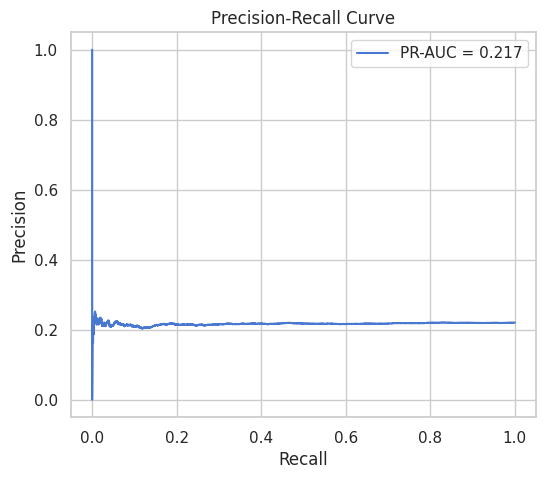

In [26]:

# 9. Model Evaluation


# Generate predictions
y_prob = model.predict(X_test).ravel()
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)


# Basic evaluation metrics

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")

print("\nDetailed classification report:")
print(classification_report(y_test, y_pred, zero_division=0))


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Precision-Recall Curve

prec_vals, rec_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec_vals, prec_vals)

print(f"PR-AUC       : {pr_auc:.4f}")

plt.figure(figsize=(6, 5))
plt.plot(rec_vals, prec_vals, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()



In [27]:

# 1. Install & Import

!pip install xgboost joblib

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# XGBoost
from xgboost import XGBClassifier


# 2. Load Dataset



df = pd.read_csv("Lung Cancer.csv", on_bad_lines="skip")
print(f"Raw dataset shape: {df.shape}")



# 3. Prepare Target Column

TARGET = "survived"

# Convert target to numeric and remove invalid rows
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=[TARGET])
df[TARGET] = df[TARGET].astype(int)  # ensure binary 0/1



# 4. Feature Engineering

# Drop irrelevant features
drop_cols = ["s", "country", "cholesterol_level", "hypertension", "cirrhosis"]
df = df.drop(columns=drop_cols, errors="ignore")

# Handle date features
df["diagnosis_date"] = pd.to_datetime(df["diagnosis_date"], errors="coerce")
df["end_treatment_date"] = pd.to_datetime(df["end_treatment_date"], errors="coerce")

ref_date = df["end_treatment_date"].max()

df["time_since_diagnosis"] = (ref_date - df["diagnosis_date"]).dt.days
df["treatment_duration"] = (df["end_treatment_date"] - df["diagnosis_date"]).dt.days

df = df.drop(columns=["diagnosis_date", "end_treatment_date"])
df = df.fillna(-1)

print(f"Cleaned dataset shape: {df.shape}")
print("Available columns:", df.columns.tolist())



# 5. Encode Features

X = df.drop(columns=[TARGET])
y = df[TARGET]

# Encode categorical features
for col in X.select_dtypes(include=["object"]).columns:
    X[col], _ = pd.factorize(X[col].astype(str))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save scaler & feature list
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")



# 6. Handle Class Imbalance

unique_classes = np.unique(y_train)
weights = compute_class_weight("balanced", classes=unique_classes, y=y_train)
class_weights_map = {int(c): w for c, w in zip(unique_classes, weights)}

print("Class weights:", class_weights_map)



# 7. Baseline Model (XGBoost)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

print("\n=== XGBoost Performance ===")
print(f"Accuracy   : {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"F1-score   : {f1_score(y_test, y_pred_xgb, zero_division=0):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=0))



# 8. Neural Network with Focal Loss

def focal_loss(gamma=2.0, alpha=0.25):
    """Custom focal loss for imbalanced binary classification."""
    def loss(y_true, y_pred):
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        bce_exp = tf.exp(-bce)
        return alpha * (1 - bce_exp) ** gamma * bce
    return loss

input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=focal_loss(),
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

early_stop = callbacks.EarlyStopping(
    monitor="val_loss", patience=6, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=256,
    class_weight=class_weights_map,
    callbacks=[early_stop],
    verbose=1
)



# 9. Evaluate Neural Network

y_prob_nn = model.predict(X_test).ravel()

print("\n=== Neural Network Results (Threshold = 0.5) ===")
y_pred_nn = (y_prob_nn >= 0.5).astype(int)
print(f"Accuracy   : {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred_nn, zero_division=0):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred_nn, zero_division=0):.4f}")
print(f"F1-score   : {f1_score(y_test, y_pred_nn, zero_division=0):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob_nn):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn, zero_division=0))

print("\n--- Threshold Tuning ---")
for thresh in [0.5, 0.4, 0.3, 0.25, 0.2]:
    y_pred_thr = (y_prob_nn >= thresh).astype(int)
    print(f"\nThreshold {thresh:.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_thr, zero_division=0):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred_thr, zero_division=0):.4f}")
    print(f"F1-score : {f1_score(y_test, y_pred_thr, zero_division=0):.4f}")


# 10. Save Models & Scaler

model.save("nn_lung_survival.keras")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(xgb, "xgb_model.pkl")

print("\n✅ Models and preprocessing objects saved successfully.")


Raw dataset shape: (890000, 17)
Cleaned dataset shape: (890000, 12)
Available columns: ['age', 'gender', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'asthma', 'other_cancer', 'treatment_type', 'survived', 'time_since_diagnosis', 'treatment_duration']
Class weights: {0: np.float64(0.6412138394119565), 1: np.float64(2.270364725164697)}

=== XGBoost Performance ===
Accuracy   : 0.5064
Precision  : 0.2206
Recall     : 0.4901
F1-score   : 0.3043
ROC-AUC    : 0.5004

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.51      0.62    138799
           1       0.22      0.49      0.30     39201

    accuracy                           0.51    178000
   macro avg       0.50      0.50      0.46    178000
weighted avg       0.66      0.51      0.55    178000

Epoch 1/50
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4940 - auc: 0.4997 - loss: 0.0436 - val_accuracy: 0.2740 - val_auc: 0.5001 - val_loss: 0.0437
Epoch

In [29]:

# 11. Prediction Pipeline for New Patients


def preprocess_patient(patient_dict, feature_columns, scaler):
    """
    Convert a single patient dictionary into the same numeric format used for training.
    Handles encoding, alignment with training features, and scaling.
    """
    df_new = pd.DataFrame([patient_dict])

    # Map cancer stage to numeric
    stage_map = {"Stage I": 1, "Stage II": 2, "Stage III": 3, "Stage IV": 4}
    df_new["cancer_stage"] = df_new["cancer_stage"].map(stage_map).fillna(0)

    # Categorize BMI
    def bmi_category(x):
        if x < 18.5: return "Underweight"
        elif 18.5 <= x < 25: return "Normal"
        elif 25 <= x < 30: return "Overweight"
        else: return "Obese"
    df_new["bmi_category"] = df_new["bmi"].apply(bmi_category)

    #  One-hot encode categorical variables
    categorical_cols = ["gender", "treatment_type", "smoking_status", "bmi_category", "family_history"]
    df_new = pd.get_dummies(df_new, columns=categorical_cols, drop_first=True, dtype=int)

    # Align columns with training feature set
    for col in feature_columns:
        if col not in df_new.columns:
            df_new[col] = 0
    df_new = df_new[feature_columns]

    # Scale numeric features
    X_new = scaler.transform(df_new)
    return X_new


def predict_patient(patient_dict):
    """
    Generate predictions for a single patient using both XGBoost and Neural Network models.
    Returns class labels and probabilities.
    """
    # Load saved artifacts
    scaler = joblib.load("scaler.pkl")
    xgb_model = joblib.load("xgb_model.pkl")
    nn_model = tf.keras.models.load_model("nn_lung_survival.keras", compile=False)
    feature_columns = joblib.load("feature_columns.pkl")

    # Preprocess patient input
    X_new = preprocess_patient(patient_dict, feature_columns, scaler)

    # XGBoost prediction
    prob_xgb = xgb_model.predict_proba(X_new)[:, 1][0]
    pred_xgb = int(prob_xgb >= 0.5)

    #  Neural Network prediction
    prob_nn = nn_model.predict(X_new).ravel()[0]
    pred_nn = int(prob_nn >= 0.5)

    return {
        "XGBoost Prediction": pred_xgb,
        "XGBoost Probability": float(prob_xgb),
        "Neural Network Prediction": pred_nn,
        "Neural Network Probability": float(prob_nn)
    }


# Example usage

example_patient = {
    "age": 25,
    "gender": "Male",
    "cancer_stage": "StageI",
    "family_history": "Yes",
    "smoking_status": "Smoker",
    "bmi": 28,
    "other_cancer": 0,
    "treatment_type": "Chemotherapy",
    "time_since_diagnosis": 300,
    "treatment_duration": 200
}

print("\n🔮 Prediction for Example Patient:")
print(predict_patient(example_patient))




🔮 Prediction for Example Patient:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
{'XGBoost Prediction': 1, 'XGBoost Probability': 0.5178295969963074, 'Neural Network Prediction': 1, 'Neural Network Probability': 0.5006487965583801}


In [30]:
#streamlit app

In [31]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 127.4 MB/s eta 0:00:00


In [32]:

import streamlit as st
import joblib
import tensorflow as tf
import pandas as pd

# Load pre-trained models
scaler = joblib.load("scaler.pkl")
xgb_model = joblib.load("xgb_model.pkl")
nn_model = tf.keras.models.load_model("nn_lung_survival.keras", compile=False)
feature_columns = joblib.load("feature_columns.pkl")



# Preprocessing function

def preprocess_patient(patient_data, feature_columns, scaler):
    """Convert user input into model-ready format."""
    df = pd.DataFrame([patient_data])

    # Map cancer stage to numeric values
    stage_map = {"Stage I": 1, "Stage II": 2, "Stage III": 3, "Stage IV": 4}
    df["cancer_stage"] = df["cancer_stage"].map(stage_map).fillna(0)

    # Categorize BMI
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return "Underweight"
        elif bmi < 25:
            return "Normal"
        elif bmi < 30:
            return "Overweight"
        else:
            return "Obese"
    df["bmi_category"] = df["bmi"].apply(categorize_bmi)

    # One-hot encode categorical features
    categorical_cols = ["gender", "treatment_type", "smoking_status", "bmi_category", "family_history"]
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

    # Ensure alignment with training columns
    for col in feature_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[feature_columns]

    # Scale numeric features
    X_scaled = scaler.transform(df)
    return X_scaled



# Prediction function

def predict_patient(patient_data):
    """Return predictions from both XGBoost and Neural Network models."""
    X = preprocess_patient(patient_data, feature_columns, scaler)

    # XGBoost prediction
    prob_xgb = xgb_model.predict_proba(X)[:, 1][0]
    pred_xgb = int(prob_xgb >= 0.5)

    # Neural Network prediction
    prob_nn = nn_model.predict(X).ravel()[0]
    pred_nn = int(prob_nn >= 0.5)

    return {
        "XGBoost Prediction": pred_xgb,
        "XGBoost Probability": float(prob_xgb),
        "Neural Network Prediction": pred_nn,
        "Neural Network Probability": float(prob_nn)
    }



# Streamlit user interface

st.title("🩺 Lung Cancer Survival Prediction")
st.write("Input patient information below to predict survival probability.")

# Collect user inputs
age = st.number_input("Age", 18, 100, 60)
gender = st.selectbox("Gender", ["Male", "Female"])
cancer_stage = st.selectbox("Cancer Stage", ["Stage I", "Stage II", "Stage III", "Stage IV"])
family_history = st.selectbox("Family History of Cancer?", ["Yes", "No"])
smoking_status = st.selectbox("Smoking Status", ["Smoker", "Non-Smoker"])
bmi = st.number_input("BMI", 10.0, 50.0, 22.0)
other_cancer = st.selectbox("Other Cancer", [0, 1])
treatment_type = st.selectbox("Treatment Type", ["Chemotherapy", "Radiation", "Surgery", "Immunotherapy"])
time_since_diagnosis = st.number_input("Days since diagnosis", 0, 5000, 365)
treatment_duration = st.number_input("Treatment duration (days)", 0, 2000, 180)

# Make prediction when user clicks button
if st.button("Predict"):
    patient_info = {
        "age": age,
        "gender": gender,
        "cancer_stage": cancer_stage,
        "family_history": family_history,
        "smoking_status": smoking_status,
        "bmi": bmi,
        "other_cancer": other_cancer,
        "treatment_type": treatment_type,
        "time_since_diagnosis": time_since_diagnosis,
        "treatment_duration": treatment_duration
    }

    results = predict_patient(patient_info)

    # Display results
    st.subheader("🔮 Prediction Results")
    st.write(f"**XGBoost Prediction:** {'Survived' if results['XGBoost Prediction'] else 'Not Survived'} "
             f"(Probability: {results['XGBoost Probability']:.2f})")
    st.write(f"**Neural Network Prediction:** {'Survived' if results['Neural Network Prediction'] else 'Not Survived'} "
             f"(Probability: {results['Neural Network Probability']:.2f})")






2025-09-26 14:14:47.638 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 14:14:47.985 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-26 14:14:47.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 14:14:47.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 14:14:47.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 14:14:47.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 14:14:47.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 14:14:47.990 Thread 'MainThread': mi

In [33]:
!pip install pyngrok --quiet


In [34]:
!ngrok authtoken 32WHIXfrfCEUAruQis6WIh72m8m_7gifJvX5Hn9wHyB5BVBc5


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [35]:
from pyngrok import ngrok
import os
import getpass
import subprocess

# Set Streamlit port
port = 8501

# Kill any running ngrok processes to avoid issues with multiple tunnels
print("Killing any running ngrok processes...")
ngrok.kill()

# Get the authtoken from Colab secrets or prompt the user
if "NGROK_AUTH_TOKEN" not in os.environ:
    os.environ["NGROK_AUTH_TOKEN"] = getpass.getpass("Enter your ngrok authtoken: ")

# Authenticate ngrok
ngrok.set_auth_token(os.environ["NGROK_AUTH_TOKEN"])

# Create public URL
public_url = ngrok.connect(port)
print(f"Your Streamlit app URL: {public_url}")

# Run Streamlit app in the background
# Make sure 'app.py' exists in the same directory or provide the correct path
# Use subprocess.Popen to run the command in the background
subprocess.Popen(["streamlit", "run", "app.py", "--server.port", str(port), "--server.headless", "true"])

Killing any running ngrok processes...
Enter your ngrok authtoken: ··········
Your Streamlit app URL: NgrokTunnel: "https://46df2a950269.ngrok-free.app" -> "http://localhost:8501"


<Popen: returncode: None args: ['streamlit', 'run', 'app.py', '--server.port...>

In [41]:
import os

# Base folder
base_folder = "lung_cancer_project"
os.makedirs(base_folder, exist_ok=True)

# Subfolders
subfolders = ["data", "models", "notebook", "app"]
for sub in subfolders:
    os.makedirs(os.path.join(base_folder, sub), exist_ok=True)


In [45]:
import shutil

# CSV to data
if os.path.exists("Lung Cancer.csv"):
    shutil.move("Lung Cancer.csv", os.path.join(base_folder, "data"))

# models
model_files = ["preprocessor.joblib", "scaler.pkl", "xgb_model.pkl", "nn_lung_survival.keras", "feature_columns.pkl"]
for file in model_files:
    if os.path.exists(file):
        shutil.move(file, os.path.join(base_folder, "models"))

#  notebook/
notebook_name = "lung_cancer_survival.ipynb"
if os.path.exists(notebook_name):
    shutil.move(notebook_name, os.path.join(base_folder, "notebook"))

# Streamlit app
if os.path.exists("app.py"):
    shutil.move("app.py", os.path.join(base_folder, "app"))


In [43]:
import shutil

shutil.make_archive(base_folder, 'zip', base_folder)


'/content/lung_cancer_project.zip'

In [44]:
from google.colab import files
files.download("lung_cancer_project.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>